# Present your objective clearly: which task are you performing ?

we will use the Fashion-MNIST dataset and we will train a neural network model to classify images of clothing, such as sneakers and shirts

# Present the dataset used (dimensions, predictors, target, and some descriptive statistics)

### Description of Fashion-MNIST dataset

Fashion-MNIST is a dataset of Zalando's article images—consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes
Each training and test example is assigned to one of the following labels:

0 : T-shirt/top

1 : Trouser

2 : Pullover

3 : Dress

4 : Coat

5 : Sandal

6 : Shirt

7 : Sneaker

8 : Bag

9 : Ankle boot

### some descriptive statistics

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
#print(tf.__version__)

In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [23]:
len(train_labels)

60000

In [24]:
np.unique(train_labels)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [7]:
train_images.shape

(60000, 28, 28)

In [8]:
test_images.shape

(10000, 28, 28)

In [13]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

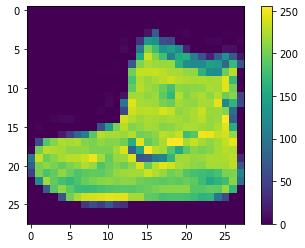

In [10]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [11]:
train_images = train_images / 255.0

test_images = test_images / 255.0

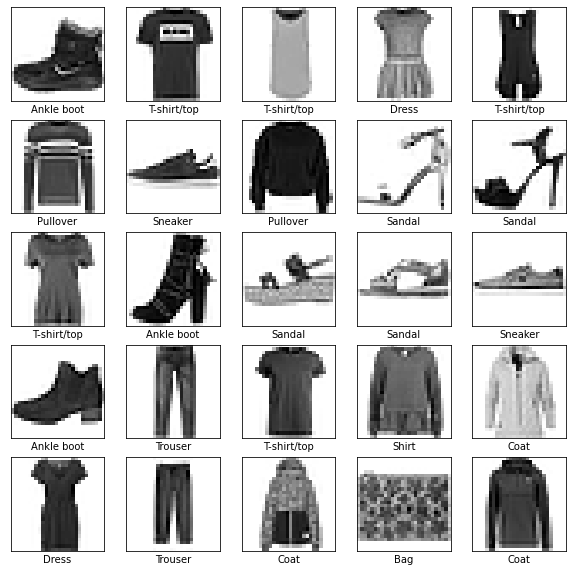

In [14]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

# Present the architecture of your neural network and illustrate it

In [17]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [18]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [19]:
from tensorflow.keras.utils import plot_model

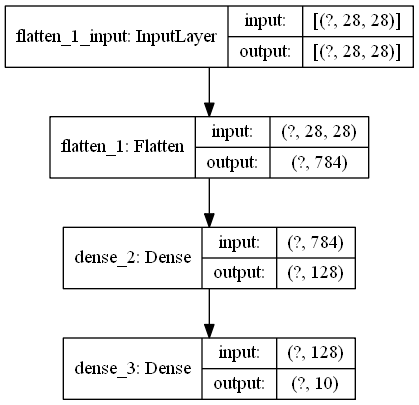

In [20]:
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

# Illustrate the prediction performance and results of your network

In [21]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [22]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 1s 684us/step - loss: 1.6752 - accuracy: 0.7953
Epoch 2/10
1875/1875 [==============================] - 2s 831us/step - loss: 1.6215 - accuracy: 0.8423
Epoch 3/10
1875/1875 [==============================] - 2s 822us/step - loss: 1.6115 - accuracy: 0.8514
Epoch 4/10
1875/1875 [==============================] - 2s 908us/step - loss: 1.6045 - accuracy: 0.8579
Epoch 5/10
1875/1875 [==============================] - 1s 776us/step - loss: 1.5959 - accuracy: 0.8659
Epoch 6/10
1875/1875 [==============================] - 2s 839us/step - loss: 1.5918 - accuracy: 0.8705
Epoch 7/10
1875/1875 [==============================] - 1s 738us/step - loss: 1.5893 - accuracy: 0.8726
Epoch 8/10
1875/1875 [==============================] - 1s 603us/step - loss: 1.5861 - accuracy: 0.8755
Epoch 9/10
1875/1875 [==============================] - 1s 662us/step - loss: 1.5837 - accuracy: 0.8780
Epoch 10/10
1875/1875 [==============================] - 1s 672u

In [31]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 0s - loss: 1.5988 - accuracy: 0.8620

Test accuracy: 0.8619999885559082


In [32]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

In [33]:
predictions = probability_model.predict(test_images)

In [34]:
predictions[0]

array([0.08533698, 0.08533698, 0.08533698, 0.08533698, 0.08533698,
       0.08533746, 0.08533698, 0.08533806, 0.08533698, 0.23196569],
      dtype=float32)

In [35]:
np.argmax(predictions[0])

9

In [36]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

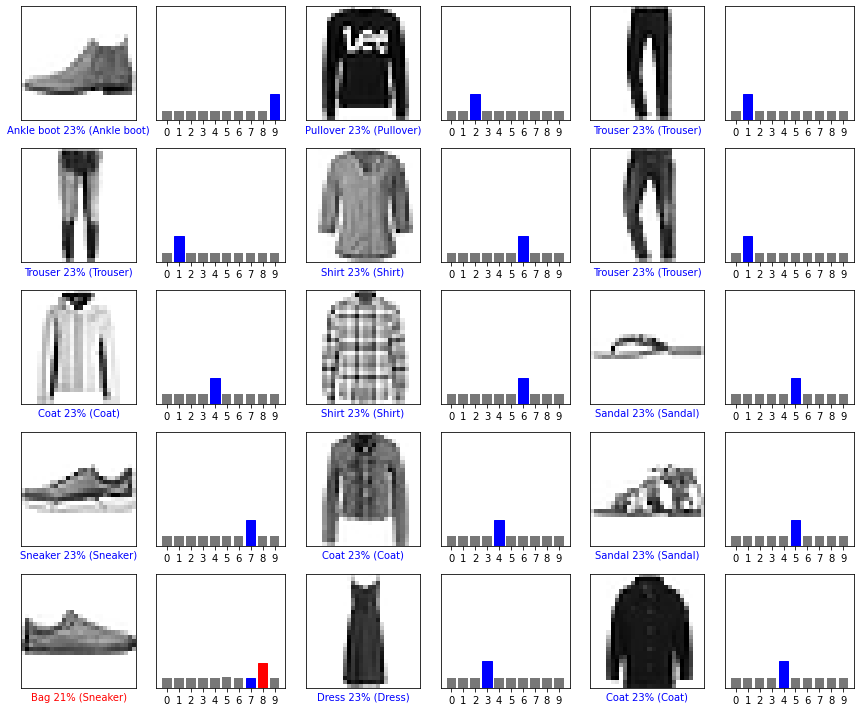

In [37]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()